In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [ ]:
monthly = pd.read_csv("assi_features.csv")
monthly['date'] = pd.to_datetime(monthly['date'])

In [ ]:
#Taking All the Required Features

assi_features = [
    'age_weighted_load',
    'growth_rate',
    'volatility',
    'anomaly'
]

In [ ]:
#Scaling All the Values to the Similar Range

scaler = MinMaxScaler()

monthly[assi_features] = scaler.fit_transform(
    monthly[assi_features]
)

In [ ]:
monthly[assi_features].describe()

,age_weighted_load,growth_rate,volatility,anomaly
count,4698.000000,4698.000000,4638.000000,4698.000000
mean,0.035229,0.015660,0.072493,0.040017
std,0.069712,0.036702,0.099969,0.196020
min,0.000000,0.000000,0.000000,0.000000
25%,0.002710,0.004743,0.012720,0.000000
50%,0.011933,0.010286,0.037427,0.000000
75%,0.038027,0.013675,0.088304,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Calculating Aadhaar Service Stress Index
monthly['ASSI'] = (
    0.40 * monthly['age_weighted_load'] +
    0.25 * monthly['growth_rate'] +
    0.20 * monthly['volatility'] +
    0.15 * monthly['anomaly']
) * 100

In [ ]:
monthly['ASSI'].describe()

,ASSI
count,4638.000000
mean,3.871125
std,7.026220
min,0.048262
25%,0.718766
50%,1.766526
75%,3.805289
max,75.412722


In [ ]:
#Classification of the Predicted Scores

def classify_stress(score):
    if score < 30:
        return 'Low'
    elif score < 60:
        return 'Medium'
    else:
        return 'High'

monthly['stress_level'] = monthly['ASSI'].apply(classify_stress)


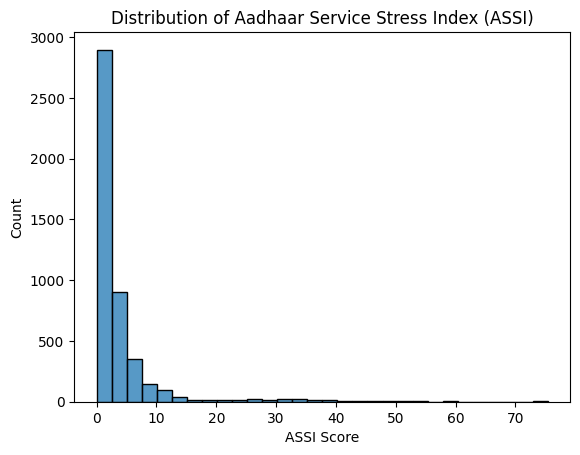

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(monthly['ASSI'], bins=30)
plt.title("Distribution of Aadhaar Service Stress Index (ASSI)")
plt.xlabel("ASSI Score")
plt.show()


In [ ]:
high_stress = monthly[monthly['stress_level'] == 'High']

high_stress[['state','district','date','ASSI']].sort_values(
    by='ASSI', ascending=False
).head(10)


,state,district,date,ASSI
1772,Karnataka,Bengaluru Urban,2025-07-31,75.412722
1771,Karnataka,Bengaluru Urban,2025-06-30,73.145334
682,Bihar,Pashchim Champaran,2025-06-30,66.956606
0,100000,100000,2025-09-30,NaN
4,Andaman & Nicobar Islands,Nicobars,2025-09-30,NaN
103,Andhra Pradesh,Mahabubnagar,2025-09-30,NaN
168,Andhra Pradesh,Visakhapatanam,2025-06-30,NaN
194,Arunachal Pradesh,Dibang Valley,2025-10-31,NaN
534,Bihar,Aurangabad(BH),2025-09-30,NaN
892,Chhattisgarh,Mohalla-Manpur-Ambagarh Chowki,2025-11-30,NaN


In [ ]:
monthly.to_csv("assi_index.csv", index=False)

In [ ]:
data = pd.read_csv("assi_index.csv")
data.head()

,state,district,date,total_enrolments,age_weighted_load,growth_rate,volatility,anomaly,ASSI,stress_level
0,100000,100000,2025-09-30,4.0,0.000416,0.013675,NaN,0.0,NaN,High
1,Andaman & Nicobar Islands,Andamans,2025-09-30,6.0,0.000485,0.013675,0.000472,0.0,0.370715,Low
2,Andaman & Nicobar Islands,Andamans,2025-10-31,6.0,0.000499,0.013675,0.000472,0.0,0.371270,Low
3,Andaman & Nicobar Islands,Andamans,2025-11-30,1.0,0.000083,0.002269,0.000472,0.0,0.069496,Low
4,Andaman & Nicobar Islands,Nicobars,2025-09-30,1.0,0.000083,0.013675,NaN,0.0,NaN,High
